<a href="https://colab.research.google.com/github/tharina11/Deep-Learning-Exercises/blob/main/6.%20Sentinel_2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: [Kaggle](https://www.kaggle.com/datasets/apollo2506/eurosat-dataset). The EuroSAT dataset consists of 27000 subsets of Sentinel 2 satellite images across 10 landcover classes. To get the high level understanding of the data set, a subset of 500 images are used to train a convolutional neural network classifier. Each image consists of 3 bands (Red, Green, and Blue). Training set consists of 300 images and testing set consists of 200 images. Both the sets have equal number of images from each class.

Code is mostly based on a tutorial in [Sentdex](https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2&ab_channel=sentdex) youtube channel. 

In [1]:
# Import libraries to import and preprocess data
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Data storage location
data_path_test = '/content/drive/MyDrive/Deep Learning/EuroSAT_RGB_subset/train'

In [4]:
# Lables for classification, names of land cover types
categories = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
              'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

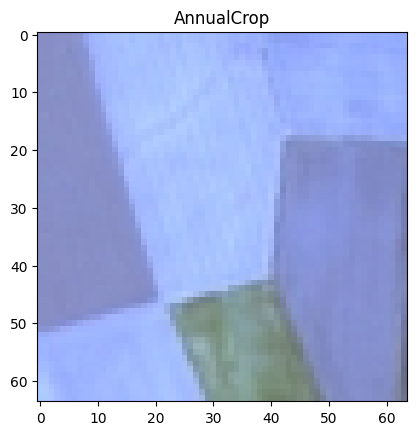

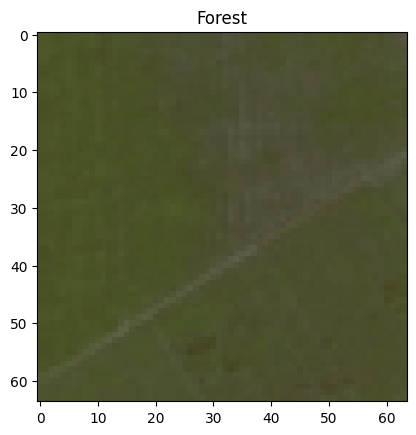

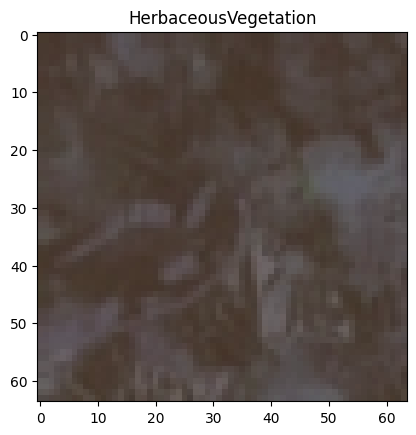

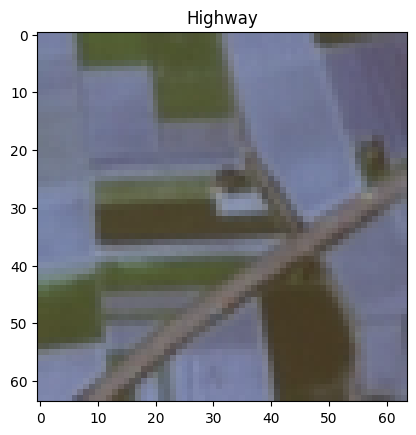

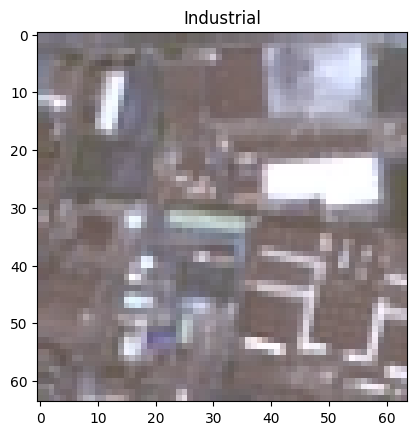

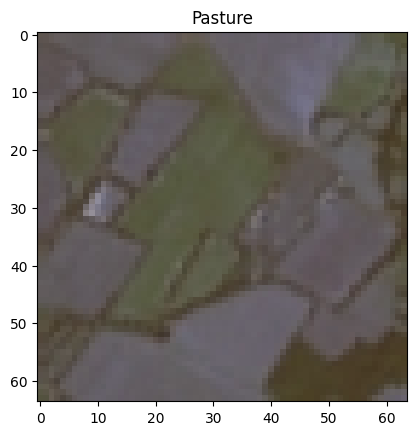

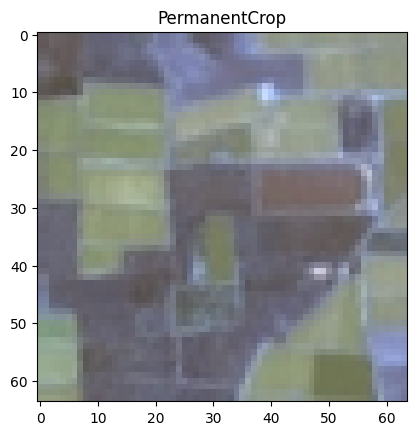

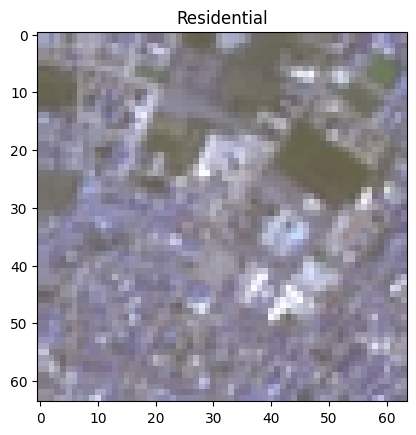

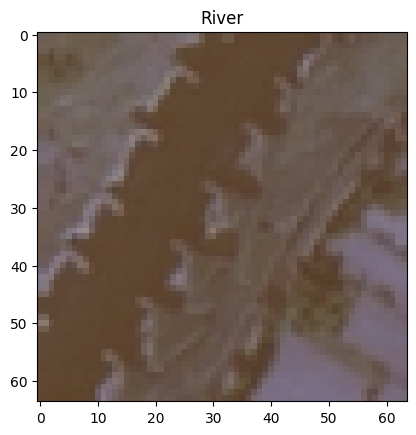

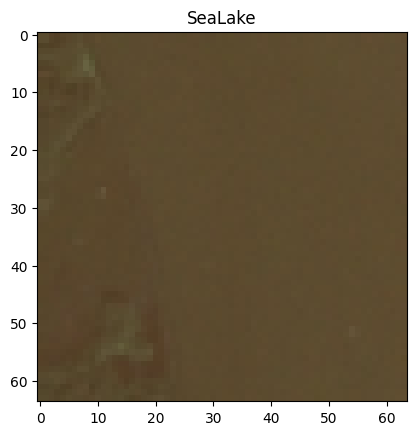

In [5]:
# Import data into training and testing images with labels
# Import data into an array and view the first image of each class

for category in categories:
    path  = os.path.join(data_path_test, category)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image))
        plt.imshow(image_array)
        plt.title(category)
        plt.show()
        break

In [6]:
# preprocess training data to feed to the neural network
image_size = 100
training_data = []
# iterate over each directory of training data, convert each image to an array and resize images, add class number to each array
def create_training_data():
    for category in categories: 
        path = os.path.join(data_path_test ,category)
        class_number = categories.index(category) 
        for image in tqdm(os.listdir(path)):
            image_array = cv2.imread(os.path.join(path,image))
            new_array = cv2.resize(image_array, (image_size, image_size))
            training_data.append([new_array, class_number]) 

create_training_data()

100%|██████████| 30/30 [00:22<00:00,  1.36it/s]


In [7]:
# Length of training data
print(len(training_data))

300


In [10]:
# Length of training data
print(training_data[0][0].shape)

(100, 100, 3)


In [11]:
# First training image
training_data[0][0]

array([[[136, 141, 196],
        [136, 141, 196],
        [136, 141, 196],
        ...,
        [148, 169, 254],
        [149, 170, 254],
        [150, 171, 255]],

       [[136, 141, 196],
        [136, 141, 196],
        [136, 141, 196],
        ...,
        [147, 170, 254],
        [148, 171, 254],
        [150, 172, 255]],

       [[136, 141, 196],
        [136, 141, 196],
        [136, 141, 196],
        ...,
        [146, 170, 254],
        [148, 172, 255],
        [149, 173, 255]],

       ...,

       [[173, 204, 255],
        [173, 203, 255],
        [173, 202, 255],
        ...,
        [125, 133, 165],
        [115, 122, 148],
        [107, 113, 136]],

       [[172, 203, 254],
        [172, 203, 254],
        [172, 202, 255],
        ...,
        [125, 133, 164],
        [116, 123, 149],
        [109, 115, 138]],

       [[171, 202, 253],
        [171, 202, 254],
        [171, 202, 255],
        ...,
        [124, 133, 164],
        [117, 124, 150],
        [111, 117, 140]]

In [12]:
# Class number of the first training image
training_data[0][1]

0

In [13]:
# Shuffle input data to provide a generalized input
import random
random.shuffle(training_data)

In [14]:
# Convert input data into numpy arrays
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, image_size, image_size, 3))

X = np.array(X).reshape(-1, image_size, image_size, 3) # Images are 3 band
y = np.asarray(y)

[[[[70 64 35]
   [70 64 35]
   [70 64 35]
   ...
   [72 59 33]
   [70 57 31]
   [68 55 29]]

  [[70 64 35]
   [70 64 35]
   [70 64 35]
   ...
   [71 59 33]
   [69 57 30]
   [67 55 28]]

  [[70 64 35]
   [70 64 35]
   [70 64 35]
   ...
   [71 60 32]
   [69 58 30]
   [67 57 28]]

  ...

  [[70 65 34]
   [70 65 34]
   [70 65 34]
   ...
   [70 65 35]
   [71 66 35]
   [71 66 35]]

  [[70 65 34]
   [70 65 34]
   [70 65 34]
   ...
   [70 65 34]
   [69 65 34]
   [69 64 33]]

  [[70 65 34]
   [70 65 34]
   [71 66 35]
   ...
   [70 65 34]
   [69 64 33]
   [68 63 32]]]]


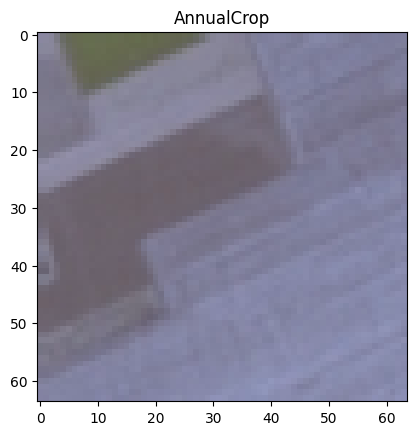

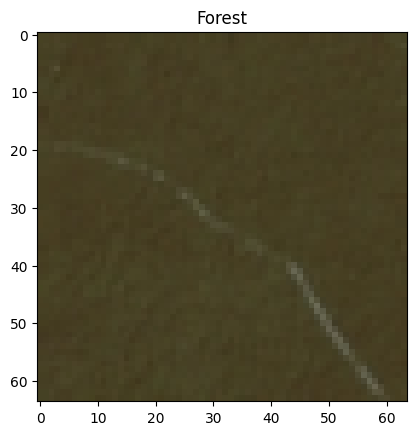

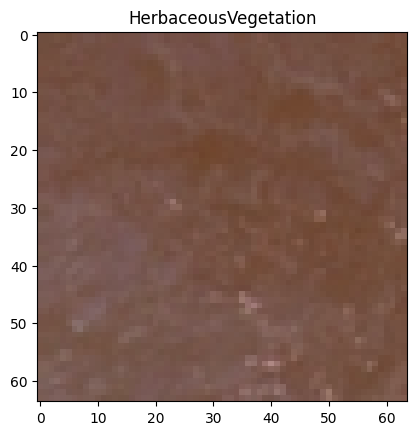

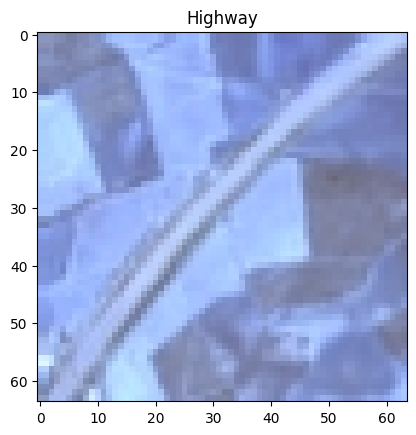

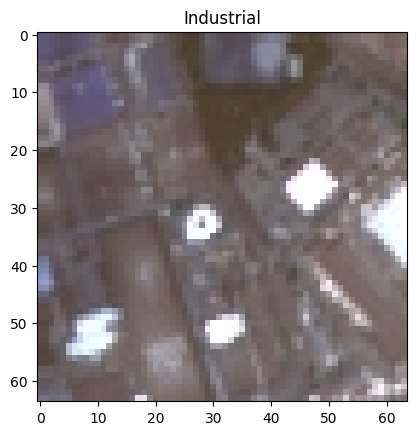

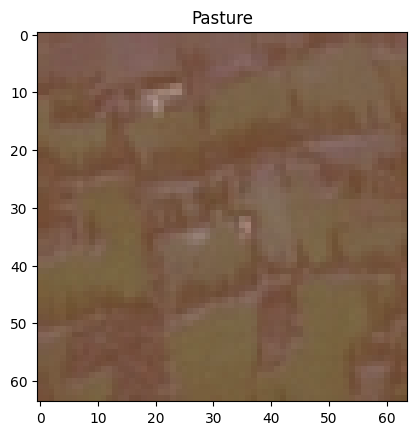

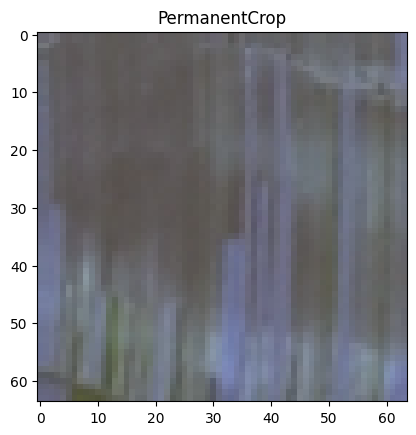

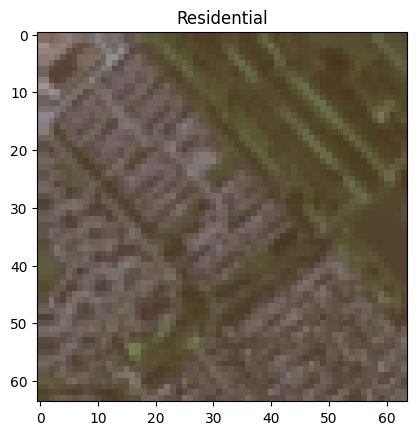

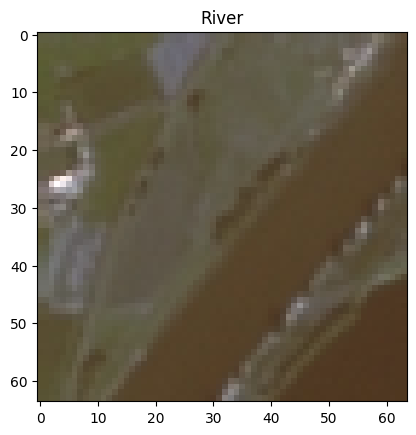

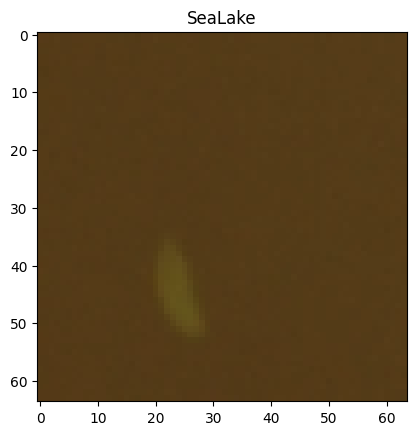

In [15]:
# Read testing data
data_path_test = '/content/drive/MyDrive/Deep Learning/EuroSAT_RGB_subset/test'

# iterate over each directory of testing data, view an image from each class
for category in categories: 
    path = os.path.join(data_path_test,category)  
    for image in os.listdir(path): 
        image_array_test = cv2.imread(os.path.join(path,image))
        plt.imshow(image_array_test)
        plt.title(category) 
        plt.show() 
        break

In [16]:
# Preprocess testing data
image_size = 100
testing_data = []

# iterate over each directory of testing data, convert each image to an array and resize images, add class number to each array
def create_testing_data():
    for category in categories:
        path = os.path.join(data_path_test,category) 
        class_number = categories.index(category) 
        for image in tqdm(os.listdir(path)):  
                image_array_test = cv2.imread(os.path.join(path,image))  
                new_array_test = cv2.resize(image_array_test, (image_size, image_size))  
                testing_data.append([new_array_test, class_number])  

create_testing_data()

100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


In [17]:
# Convert testing data into numpy arrays
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, image_size, image_size, 3))
y_test = np.asarray(y_test)
X_test = np.array(X_test).reshape(-1, image_size, image_size, 3) # The images are 3 band

[[[[138 135 161]
   [138 135 160]
   [138 135 159]
   ...
   [125 125 155]
   [125 125 156]
   [126 126 156]]

  [[138 135 160]
   [138 135 160]
   [138 135 158]
   ...
   [125 125 155]
   [125 126 155]
   [126 126 155]]

  [[137 135 159]
   [138 135 159]
   [138 136 157]
   ...
   [125 125 155]
   [125 126 155]
   [126 127 155]]

  ...

  [[131 130 162]
   [131 131 162]
   [131 131 161]
   ...
   [135 139 174]
   [137 141 177]
   [138 142 179]]

  [[131 130 162]
   [131 130 161]
   [130 130 161]
   ...
   [138 141 178]
   [139 142 179]
   [139 142 180]]

  [[131 130 162]
   [131 129 161]
   [130 129 161]
   ...
   [141 143 181]
   [140 143 181]
   [140 143 181]]]]


In [18]:
# Scale feature data to 0 to 1 range
X_test = X_test/255.0

In [19]:
# Import libraries to build neural network
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [94]:
# Convolutional neural network
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [95]:
# Compile the CNN
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
# Summmary of the model
cnn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 33856)             0         
                                                                 
 dense_34 (Dense)            (None, 64)              

In [97]:
# Fit the model
cnn.fit(X, y, validation_split=0.2, batch_size=10, epochs=15)

Epoch 1/15
24/24 [==============================] - 2s 13ms/step - loss: 61.3520 - accuracy: 0.1250 - val_loss: 2.7193 - val_accuracy: 0.1167
Epoch 2/15
24/24 [==============================] - 0s 7ms/step - loss: 2.2996 - accuracy: 0.1750 - val_loss: 2.2767 - val_accuracy: 0.0833
Epoch 3/15
24/24 [==============================] - 0s 7ms/step - loss: 2.2396 - accuracy: 0.1750 - val_loss: 2.3096 - val_accuracy: 0.1333
Epoch 4/15
24/24 [==============================] - 0s 7ms/step - loss: 2.1360 - accuracy: 0.2792 - val_loss: 2.2652 - val_accuracy: 0.2000
Epoch 5/15
24/24 [==============================] - 0s 6ms/step - loss: 1.8752 - accuracy: 0.3750 - val_loss: 2.3470 - val_accuracy: 0.1667
Epoch 6/15
24/24 [==============================] - 0s 6ms/step - loss: 1.5910 - accuracy: 0.5000 - val_loss: 2.5166 - val_accuracy: 0.2000
Epoch 7/15
24/24 [==============================] - 0s 6ms/step - loss: 1.5656 - accuracy: 0.4958 - val_loss: 2.3628 - val_accuracy: 0.1500
Epoch 8/15
24/24 [

In [98]:
# Evaluate what percentage of testing data is correctly classified
cnn.evaluate(X_test,y_test)

7/7 [==============================] - 0s 6ms/step - loss: 2.3219 - accuracy: 0.1000


[2.321920871734619, 0.10000000149011612]

####**Reference**:
- [Kaggle EuroSAT dataset](https://www.kaggle.com/datasets/apollo2506/eurosat-dataset)
- [Sentdex - Deep Learning Playlist](https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2&ab_channel=sentdex)
- [Transfer Learning with MobileNetV2 - kaggle](https://www.kaggle.com/code/dineshgulati/transfer-learning-with-mobilenetv2)